# Requirements
### Goal. 
Based on the dataset description in Kaggle, describe the goal of the A/B test. Give any necessary context.
Target metric. Choose a target metric and describe how it measures progress towards the stated goal of the A/B test.


### Calculations.
- In your notebook, aggregate and prepare data as needed. Report key information about the A/B test, including the sample size and variant proportions.
- Conduct statistical tests. Describe which test you have chosen for each metric and why.
- Report the estimated treatment effect, confidence interval and p-value. For one of the datasets, compute the confidence interval both analytically and using bootstrap and report both intervals.
### Decision. 
Describe clearly what your calculations imply and which decision you recommend. Use visualizations to show differences in the metric between groups and confidence intervals.

---

## **Goal of the A/B Test**

The goal of this A/B test is to evaluate the effectiveness of three different marketing campaigns (Promotions 1, 2, and 3) in increasing the weekly sales of a new fast-food menu item. The fast-food chain aims to identify the most successful promotion strategy that can be implemented across its locations to maximize revenue and customer engagement.

#### **Context**
- **Background**: A new menu item was introduced in several randomly selected market locations. To determine the best marketing strategy, the chain tested three distinct promotional campaigns during the first four weeks after the product launch.
- **Objective**: By analyzing weekly sales data, the chain seeks to:
  - Understand the impact of each promotional campaign on sales performance.
  - Make data-driven decisions to roll out the most effective promotion to all locations.
- **Experiment Setup**:
  - Markets were randomly assigned one of three promotional campaigns.
  - Weekly sales data were recorded for each store over a four-week period, capturing the initial customer response to the new product.
  - Factors such as **Market Size**, **Store Age**, and **Week Number** provide additional context and may influence the results.

#### **Key Questions**
1. Which promotion led to the highest average sales?
2. Are the differences in sales across the promotions statistically significant?
3. Can the company confidently choose a promotion based on these findings?


---

# Locker dashboard

https://lookerstudio.google.com/u/0/reporting/d295feb3-66a8-41ed-8fd5-0c8439d20118/page/lcdYE

---

### Target Metric
The chosen target metric is Sales in Thousands (SalesInThousands). This metric directly reflects the revenue generated by each campaign. It is a straightforward and meaningful measure of success as it ties the performance of each promotion to its financial outcome.

In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(rc = {'figure.figsize':(14,4)})

In [4]:
# Path of the file to read
filepath = "WA_Marketing-Campaign.csv"

# Read the file into a variable
df = pd.read_csv(filepath)#, index_col="Date", parse_dates=True)

In [5]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [6]:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [MarketID, MarketSize, LocationID, AgeOfStore, Promotion, week, SalesInThousands]
Index: []


No missing data.

'Promotion' and 'week' type are to be changed to string.

In [7]:
df = df.astype({"Promotion": str})

In [8]:
df = df.astype({"week": str})

#### Sales by promotion

In [9]:
df.groupby('Promotion')["SalesInThousands"].aggregate(['min', 'max', 'mean', 'sum'])

,min,max,mean,sum
Promotion,,,,
1,30.81,99.65,58.099012,9993.03
2,17.34,88.64,47.329415,8897.93
3,22.18,96.48,55.364468,10408.52


Text(0.5, 1.0, 'Sales by Promotions')

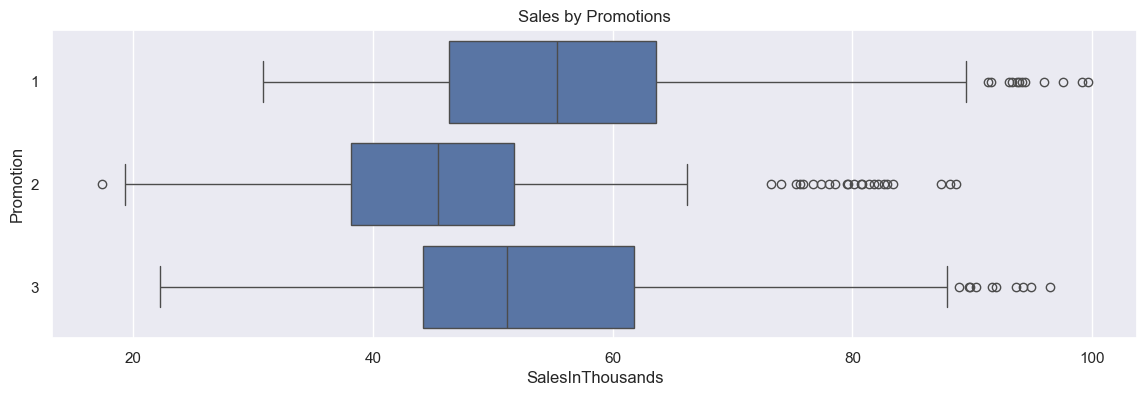

In [10]:
sns.boxplot(data = df, x='SalesInThousands', y='Promotion', order=['1', '2', '3'])
plt.title(f'Sales by Promotions', fontsize=12)

Promotion 1 has greater sales.

#### Sales by promotion and market size.

In [11]:
df.groupby(['Promotion', 'MarketSize'])["SalesInThousands"].aggregate(['min', 'max', 'mean', 'sum'])

min    max       mean      sum
Promotion MarketSize                                  
1         Large       49.62  99.65  75.235893  4213.21
          Medium      30.81  65.11  47.672604  4576.57
          Small       51.72  68.42  60.162500  1203.25
2         Large       39.36  88.64  60.322031  3860.61
          Medium      17.34  58.10  39.114352  4224.35
          Small       36.17  61.25  50.810625   812.97
3         Large       50.05  96.48  77.203958  3705.79
          Medium      22.18  64.14  45.468879  5274.39
          Small       46.83  70.60  59.514167  1428.34

Text(0.5, 1.0, 'Sales by Promotions and market size')

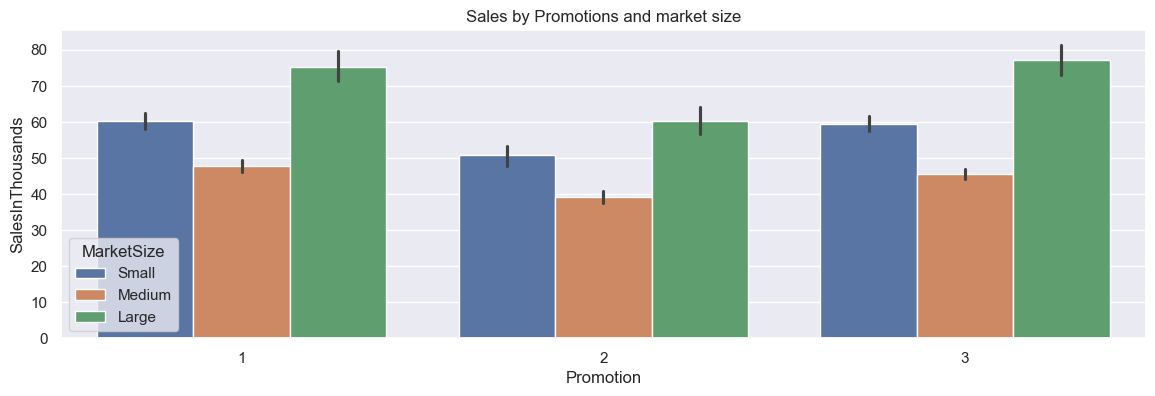

In [12]:
sns.barplot(data = df, y='SalesInThousands', x='Promotion', hue='MarketSize', hue_order=['Small', 'Medium', 'Large'],order=['1', '2', '3'])
plt.title(f'Sales by Promotions and market size', fontsize=12)

Text(0.5, 1.0, 'Sales distribution by Promotions and market size')

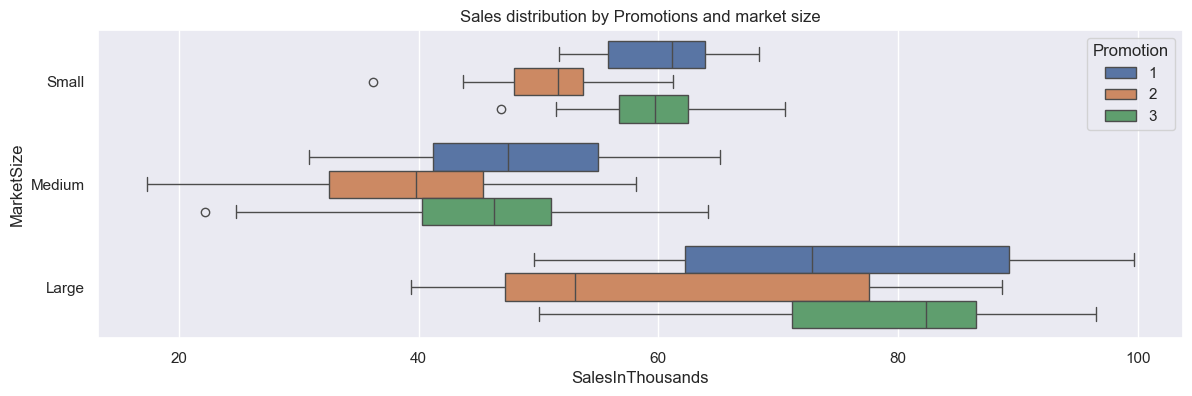

In [13]:
sns.boxplot(data = df, x='SalesInThousands', hue='Promotion', y='MarketSize', order=['Small', 'Medium', 'Large'], hue_order=['1', '2', '3'])
plt.title(f'Sales distribution by Promotions and market size', fontsize=12)

In [14]:
df.groupby('MarketSize')['MarketSize'].count()/len(df)

MarketSize
Large     0.306569
Medium    0.583942
Small     0.109489
Name: MarketSize, dtype: float64

Text(0.5, 1.0, 'Sales countplot by Promotions')

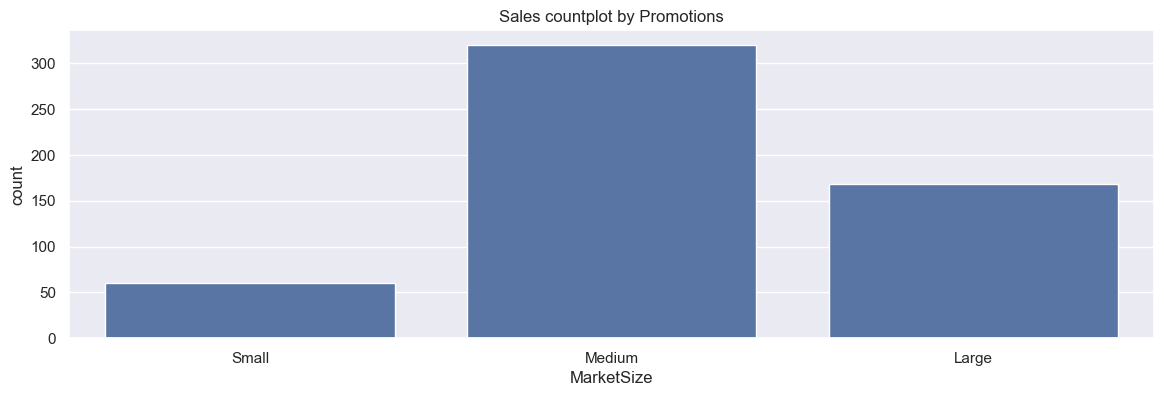

In [15]:
sns.countplot(data = df, x='MarketSize', order=['Small', 'Medium', 'Large'])
plt.title(f'Sales countplot by Promotions', fontsize=12)

- Promotion 1 and promotion 2 have similar sales for all market sizes.
- Market size: small 11%, medium 58%, large 31%

##### Sales by promotion and market size distributions

Text(0.5, 1.0, 'Sales distribution by Promotions')

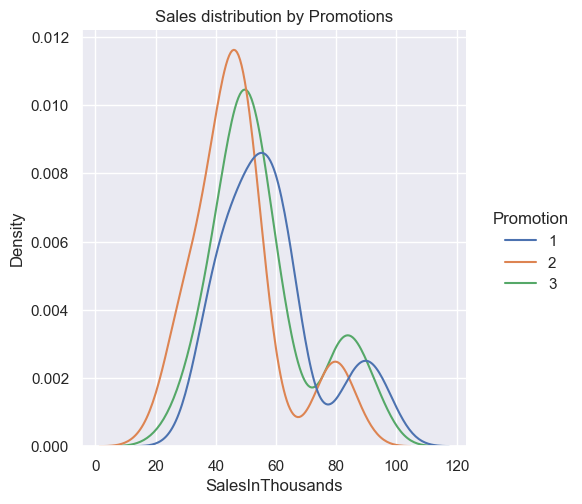

In [16]:
sns.displot(df, x="SalesInThousands", hue="Promotion", kind="kde", multiple="layer", hue_order=['1', '2', '3'])
plt.title(f'Sales distribution by Promotions', fontsize=12)

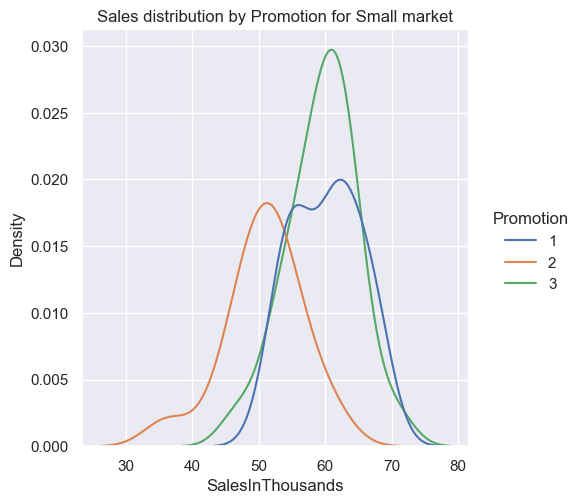

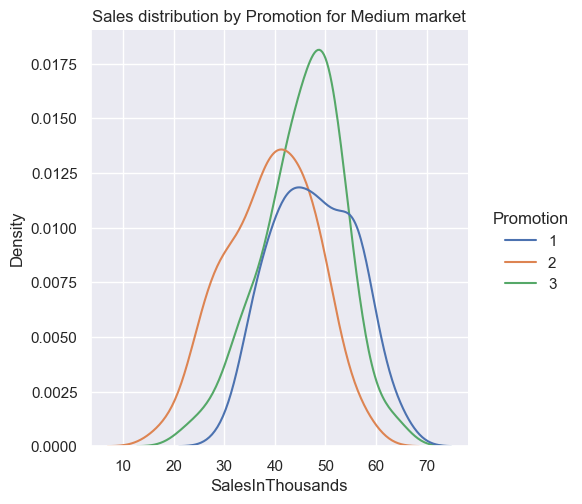

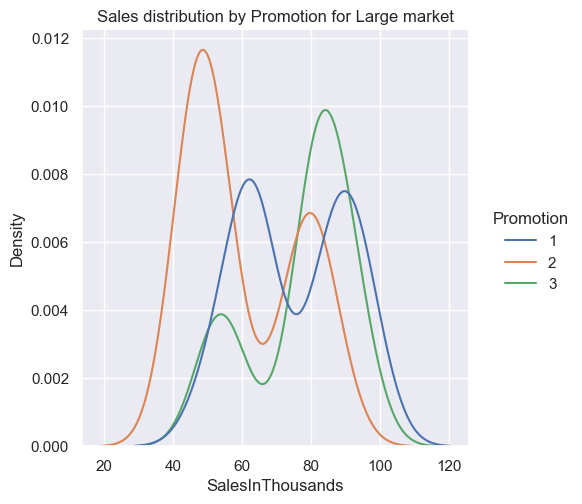

In [17]:
for ms in ['Small', 'Medium', 'Large']:
    # print(ms)
    ax = sns.displot(df[df['MarketSize'] == ms], x="SalesInThousands", hue="Promotion", kind="kde", multiple="layer", hue_order=['1', '2', '3'])
    ax.set(label='SFSD')
    plt.title(f'Sales distribution by Promotion for {ms} market', fontsize=12)
    plt.show()

Sales distributions of promotion1 and promotion2 are similar.

All three promotions have two peaks in overall distribution

All three promotions have two peaks in distribution for Large market.

#### Sales by week

In [18]:
df.groupby(['Promotion', 'week'])["SalesInThousands"].aggregate(['min', 'max', 'mean', 'sum'])

min    max       mean      sum
Promotion week                                  
1         1     35.30  99.65  58.244419  2504.51
          2     35.86  96.01  56.929535  2447.97
          3     32.05  99.12  58.774884  2527.32
          4     30.81  97.61  58.447209  2513.23
2         1     27.81  88.64  47.730213  2243.32
          2     17.34  82.86  47.582553  2236.38
          3     23.93  88.12  47.722128  2242.94
          4     19.26  80.75  46.282766  2175.29
3         1     24.75  96.48  55.776170  2621.48
          2     22.18  90.30  55.949149  2629.61
          3     29.03  93.63  54.377872  2555.76
          4     26.68  94.21  55.354681  2601.67

In [19]:
df.groupby('week')["SalesInThousands"].aggregate(['min', 'max', 'mean', 'sum'])

,min,max,mean,sum
week,,,,
1,24.75,99.65,53.790584,7369.31
2,17.34,96.01,53.386569,7313.96
3,23.93,99.12,53.474599,7326.02
4,19.26,97.61,53.213066,7290.19


Text(0.5, 1.0, 'Sales barplot by Promotions and weeks ')

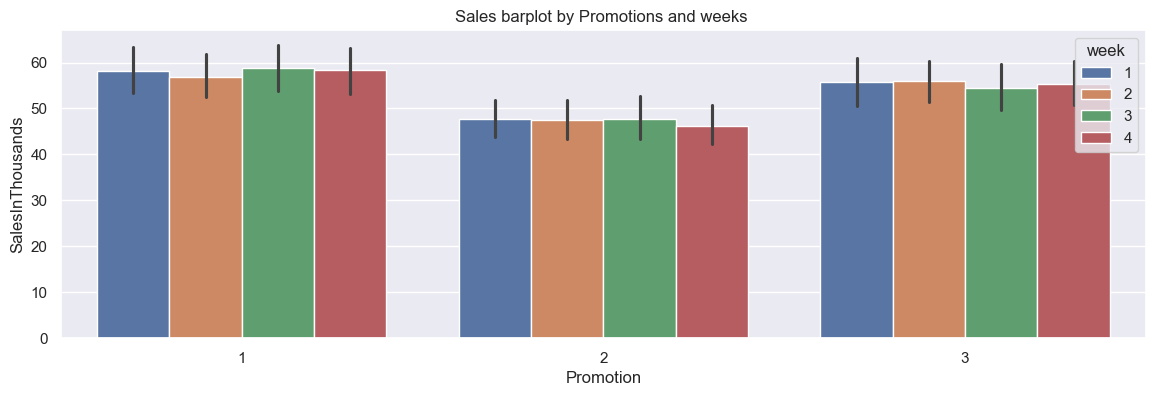

In [20]:
sns.barplot(data=df, x='Promotion', y='SalesInThousands', hue='week', order=[1, 2, 3])
plt.title(f'Sales barplot by Promotions and weeks ', fontsize=12)

Text(0.5, 1.0, 'Sales distribution as a boxplot by Promotions andweeks')

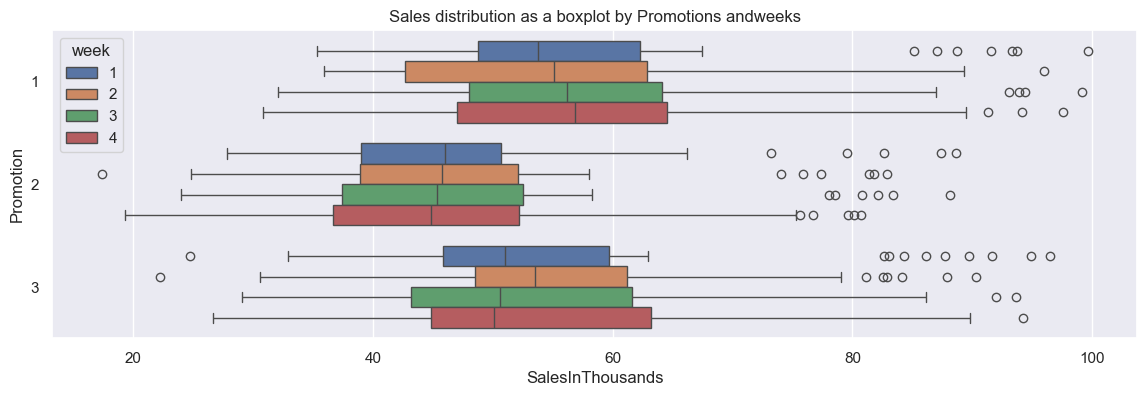

In [21]:
sns.boxplot(df, x="SalesInThousands", y='Promotion', hue='week', order=[1, 2, 3])
plt.title(f'Sales distribution as a boxplot by Promotions andweeks', fontsize=12)

Sales are spreaded evenly on weeks.

#### Sales by store age

Text(0.5, 1.0, 'Sales barplot by store age')

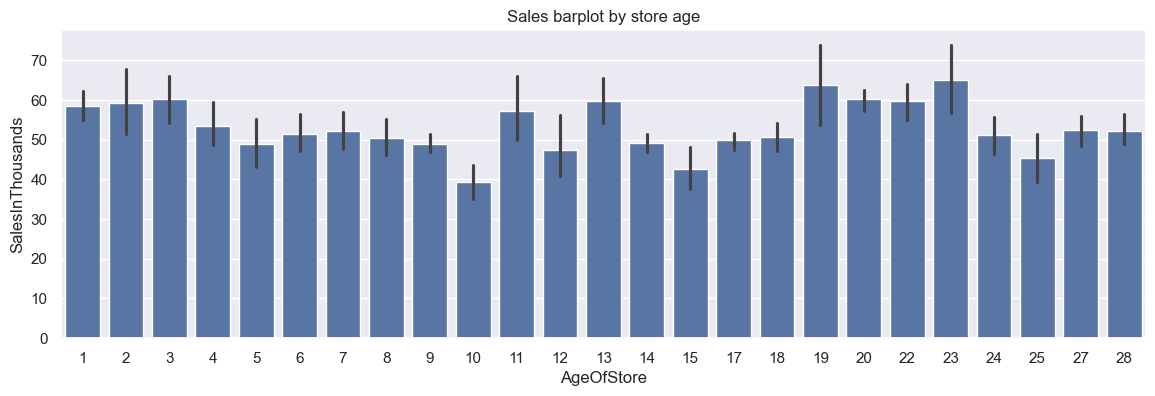

In [22]:
sns.barplot(data=df, y='SalesInThousands',  x='AgeOfStore')
plt.title(f'Sales barplot by store age', fontsize=12)

In [23]:
df.groupby(['Promotion', 'MarketSize'])['AgeOfStore'].aggregate(['min', 'max', 'mean', 'sum'])

min  max       mean   sum
Promotion MarketSize                           
1         Large         1   24   5.857143   328
          Medium        1   27   9.125000   876
          Small         3   22  11.000000   220
2         Large         1   23   8.437500   540
          Medium        1   25   7.481481   808
          Small         1   28   9.500000   152
3         Large         1   19   6.916667   332
          Medium        1   24   9.724138  1128
          Small         5   22  11.500000   276

Text(0.5, 1.0, 'Store age distribution by Promotions')

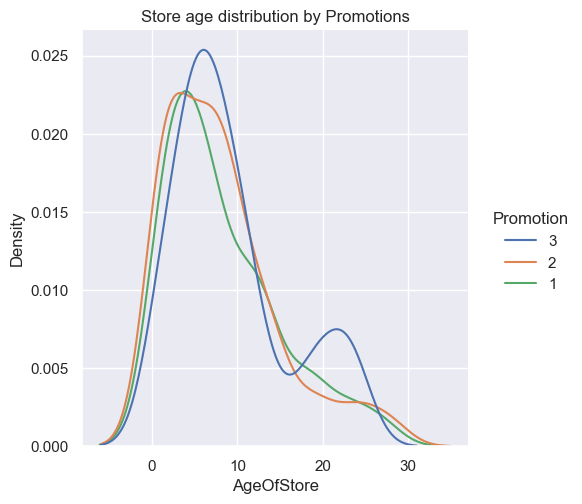

In [24]:
sns.displot(df, x="AgeOfStore", hue="Promotion", kind="kde", multiple="layer")
plt.title(f'Store age distribution by Promotions', fontsize=12)

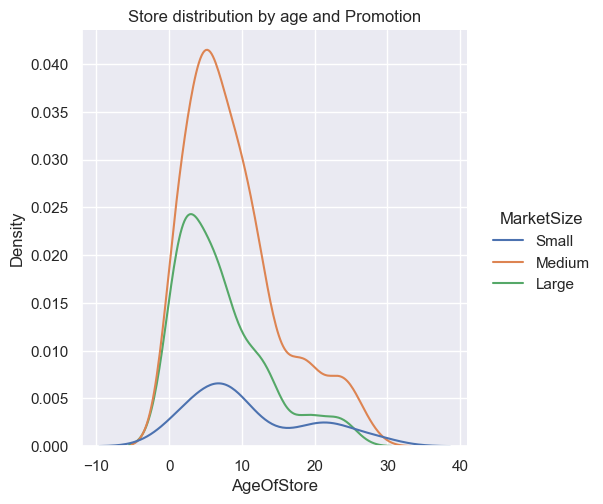

In [25]:
sns.displot(df, x="AgeOfStore", hue="MarketSize", kind="kde", multiple="layer", hue_order=['Small', 'Medium', 'Large'])
plt.title('Store distribution by age and Promotion', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Store age distribution by Promotions and market size')

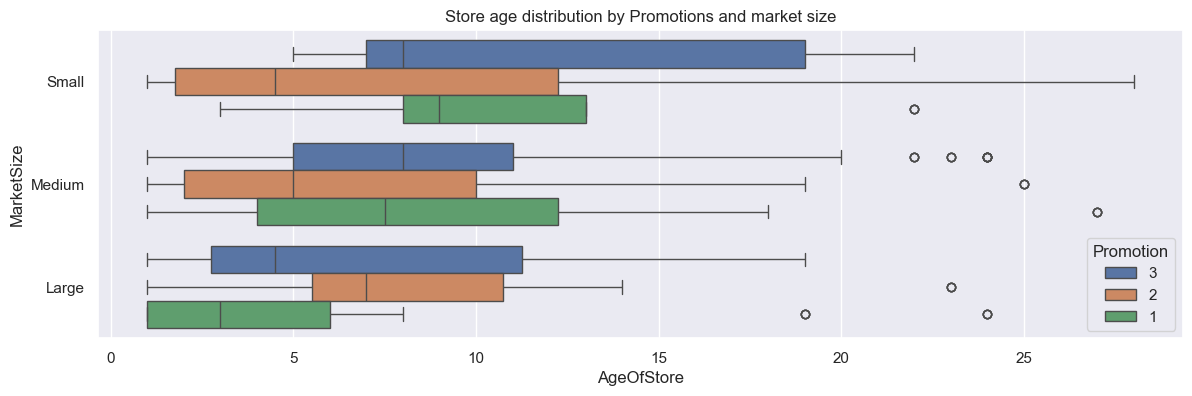

In [26]:
sns.boxplot(df, x="AgeOfStore", hue='Promotion', y='MarketSize', order=['Small', 'Medium', 'Large'])
plt.title(f'Store age distribution by Promotions and market size', fontsize=12)

- There is no big difference in store ages for different promotions. 
- Age distributions are similar.

## Weeks combined

As each store participates 4 times in the dataset (1 time for each of 4 weeks) the dataset should be modified: rows are to be combined by the store with sales average.

In [27]:
df.shape

(548, 7)

In [28]:
df_weeks_combined = df.groupby('LocationID', as_index=False).agg({
    'MarketID': 'first',          # Keep the first MarketID (if consistent within LocationID)
    'MarketSize': 'first',        # Keep the first MarketSize (if consistent within LocationID)
    'AgeOfStore': 'first',        # Keep the first AgeOfStore (if consistent within LocationID)
    'Promotion': 'first',         # Keep the first Promotion (if consistent within LocationID)
    'SalesInThousands': 'mean'    # Calculate the average SalesInThousands
})

In [29]:
df_weeks_combined.shape

(137, 6)

There are 137 rows of data after combining.

## Sample sizes

Sample sizes after combining data by store.

In [30]:
df_weeks_combined.groupby('Promotion')['LocationID'].count()

Promotion
1    43
2    47
3    47
Name: LocationID, dtype: int64

- Promotion 1:    43 records (31.4%)
- Promotion 2:    47 records (34.3%)
- Promotion 3:    47 records (34.3%)

Promotion 1 has 16 (8.5%) less records than promotion 2 and promotion 3.

### Testing for sample ratio mismatch using the chi-square test.

In [31]:
from scipy.stats import chisquare

In [32]:
f_obs = np.array([43, 47, 47])/137

In [33]:
chisquare(f_obs)

Power_divergenceResult(statistic=np.float64(0.0017049389951515818), pvalue=np.float64(0.9991478937513195))

p-value for chi square is 99.9% hence there is no significant difference in sample numbers. Discrepancy should be expected due to randomness of sampling.

## Promotions means with confidence intervals

In [34]:
# Group data by promotion and calculate mean and standard error
means = df_weeks_combined.groupby('Promotion')['SalesInThousands'].mean()
se = df_weeks_combined.groupby('Promotion')['SalesInThousands'].sem()

# Calculate 95% confidence intervals
ci_lower = means - 1.96 * se
ci_upper = means + 1.96 * se

# Combine results into a DataFrame
ci_data = pd.DataFrame({'Mean': means, 'CI Lower': ci_lower, 'CI Upper': ci_upper})
ci_data.reset_index(inplace=True)
ci_data

,Promotion,Mean,CI Lower,CI Upper
0,1,58.099012,53.308221,62.889803
1,2,47.329415,43.184762,51.474068
2,3,55.364468,50.680397,60.048540


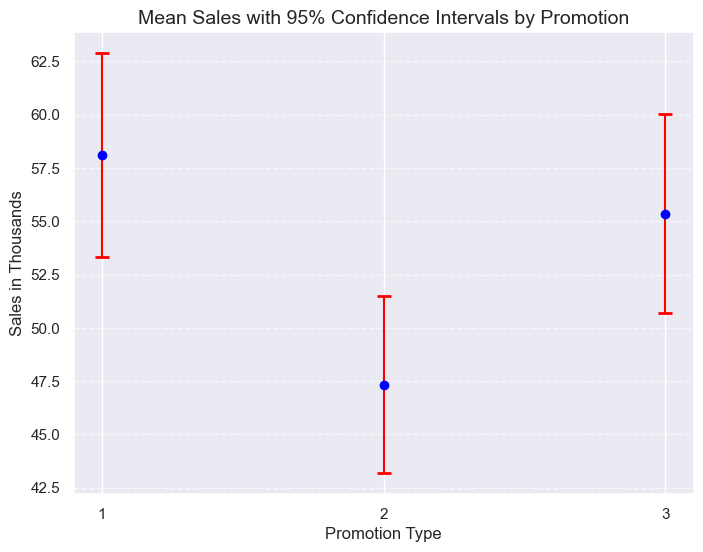

In [35]:
import matplotlib.pyplot as plt

# Plotting means with confidence intervals
plt.figure(figsize=(8, 6))
plt.errorbar(ci_data['Promotion'], ci_data['Mean'], 
             yerr=[ci_data['Mean'] - ci_data['CI Lower'], ci_data['CI Upper'] - ci_data['Mean']], 
             fmt='o', capsize=5, capthick=2, color='blue', ecolor='red')

plt.title('Mean Sales with 95% Confidence Intervals by Promotion', fontsize=14)
plt.xlabel('Promotion Type', fontsize=12)
plt.ylabel('Sales in Thousands', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

It seen from the plot shown above that sales mean for promotion 1 doesn't overlap with promotion 2 and promotion 1 overlaps with promotion 3. 

Promotion 2 and promotion 3 overlaps by their edges.

#### ANOVA test

Since there are 3 samples it is convenient to use ANOVA test to determine whether there is a statistical difference between them.

Hypothesis Formulation

H0: M1 = M2 = M3 -> There isnot a statistically significant difference between Sales of he Promotions

H1: M1 != M2 != M3 -> There is a statistically significant difference between Sales of he Promotions

In [36]:
from scipy.stats import f_oneway

In [37]:
fvalue, pvalue = f_oneway(df_weeks_combined[df_weeks_combined['Promotion']=='1']['SalesInThousands'], 
                          df_weeks_combined[df_weeks_combined['Promotion']=='2']['SalesInThousands'], 
                          df_weeks_combined[df_weeks_combined['Promotion']=='3']['SalesInThousands'])
print(fvalue, pvalue)

5.845791931827381 0.0036805468987115603


#### Interpretation

The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among promotions.

F value is inversely related to p value and higher F value (greater than F critical value) indicates a significant p value.

F-value is greater than critical (2.6)

### Post-hoc Turkey's test

Since ANOVA test concluded that there is statistical difference between the three samples, a post-hoc test is to be performed to determine a sample that differs from the others.

In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [39]:
tukey_oneway = pairwise_tukeyhsd(endog = df_weeks_combined['SalesInThousands'], groups = df_weeks_combined["Promotion"])
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-10.7696,0.004,-18.5951,-2.944,True
1,3,-2.7345,0.6862,-10.5601,5.091,False
2,3,8.0351,0.0371,0.3854,15.6847,True


In [40]:
tukey_oneway.pvalues

array([0.00398999, 0.686231  , 0.0370848 ])

Promotion1 has higher sales than promotion2 by 10.8 in average with confidence interval from 2.94 to 18.60.

Promotion3 has higher sales than promotion2 by 8.04 in average with confidence interval from 0.38 to 15.68.

we would conclude that there is a statistically significant difference between the means of promotion1 and promotion2 and promotion2 and promotion3, but not a statistically significant difference between the means of promotion1 and promotion3.

Estimated difference between the mean sales resulting from promotion1 and promotions3: -2.73 (with 95% confidence that the exact value for this difference is between -10.56 and 5.09.

Hypothesis that promotion1 and promotion3 samples are taken from the same distribution can not be rejected.

Promotion1 and promotion2 have higher sales in comparison to promotion2.

## Conclusion


Promotion 1 has higher results than the other two promotions, however there is no significant difference compared to promotion 3.

Promotion 1 and promotion 3 have signicantly higher sales in comparison to promotion 2.

It is recomended to the company to choose promotion 1 or promotion 3.